<a href="https://colab.research.google.com/github/anuragmishra218/my_prac/blob/master/ejam_Jay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
# Importing all the libraries for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [11]:
# Extraction Process from csv to pandas dataframe
df = pd.read_csv("price_train.csv")
df.head()

,X1,id,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,5460,22146017,False,99%,within an hour,521,False,5,Downtown,Apartment,Entire home/apt,47.612163,-122.338239,4,2.0,2,2,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",$129.00,2,1125,True,strict,$279.00
1,4143,18638163,True,100%,within an hour,1,True,2,Queen Anne,House,Entire home/apt,47.640827,-122.355248,1,1.0,0,1,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$50.00,2,30,True,moderate,$99.00
2,5802,22734110,True,100%,within an hour,1,False,4,Rainier Valley,Guest suite,Entire home/apt,47.549007,-122.273951,2,1.0,1,2,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",$25.00,2,28,False,moderate,$75.00
3,776,3946674,True,90%,within a few hours,1,True,2,Central Area,House,Private room,47.601922,-122.307979,1,1.0,1,1,Real Bed,"{Internet,Wifi,Kitchen,""Pets live on this prop...",$0.00,2,30,False,flexible,$70.00
4,6064,23610186,True,100%,within an hour,4,True,8,Beacon Hill,House,Entire home/apt,47.552311,-122.293409,6,2.5,3,3,Real Bed,"{TV,Wifi,Kitchen,""Free parking on premises"",""S...",$99.00,2,12,False,flexible,$242.00


In [211]:
# function to print and calculate total amenities


def total_amenities(x):
  total_amen = []
  for i in x:
    z = i.replace('{' , '')
    z = z.replace('}' , '')
    z = z.replace('"' , '').split(',')
    for j in z:
      if j not in total_amen:
        total_amen.append(j)
        print(j)

  print(len(total_amen))


total_amenities(df['amenities'])

TV
Internet
Wifi
Kitchen
Elevator
Heating
Family/kid friendly
Washer
Dryer
Smoke detector
Carbon monoxide detector
First aid kit
Safety card
Fire extinguisher
Essentials
Shampoo
Hangers
Hair dryer
Iron
Laptop friendly workspace
Self check-in
Smart lock
Keypad
Private living room
Cable TV
Air conditioning
Pets live on this property
Free street parking
Indoor fireplace
translation missing: en.hosting_amenity_49
translation missing: en.hosting_amenity_50
Private entrance
Hot water
Bed linens
Microwave
Coffee maker
Refrigerator
Dishwasher
Dishes and silverware
Cooking basics
Oven
Stove
Luggage dropoff allowed
Full kitchen
Room-darkening shades
Patio or balcony
Lock on bedroom door
Other
Free parking on premises
Smoking allowed
Breakfast
Hot tub
Suitable for events
24-hour check-in
Extra pillows and blankets
Garden or backyard
Wide doorway
Wide entryway
Handheld shower head
Buzzer/wireless intercom
Pack ’n Play/travel crib
Pool
Pets allowed
Gym
Single level home
BBQ grill
Long term stays al

In [120]:
# Univariate Analysis of each column to get to know dataset more clearly
# function to present the count plot graph
def CountPlot(x,df,xl='x-axis',yl='Total Count',title='Countplot',z=0):
  length = len(df)
  g=sns.countplot(x=x,data=df)
  for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,height + 20,'{:1.2f}%'.format(height/length*100),ha="center") 
  g.set(xlabel=xl, ylabel=yl, title=title)
  plt.xticks(rotation=z)
  plt.show()

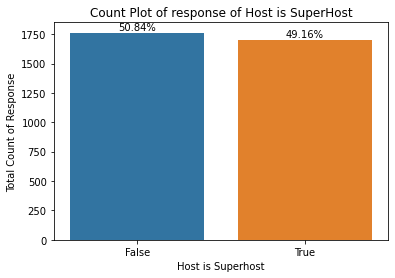

In [121]:
# Visualizing countplot of column 'host_is_superhost'
CountPlot('host_is_superhost',df,'Host is Superhost','Total Count of Response','Count Plot of response of Host is SuperHost')

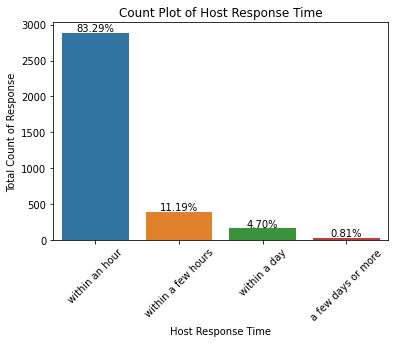

In [122]:
# Visualizing countplot of column 'host_response_time'
CountPlot('host_response_time',df,'Host Response Time','Total Count of Response','Count Plot of Host Response Time',45)

In [215]:
# Now creating ETL pipline class which will Extract the csv data, transform into required format and then save the new dataset as csv.
class ETL:
  def __init__(self, Path,Train=True):
    self.df = pd.read_csv(Path)
    self.Train = Train
    self.Transform()
  
  # Method to Transform the data into required format

  def Transform(self):
    # Deleting X1 and id columns as they both are for identification 
    self.df = self.df.drop(['X1','id'],axis=1)

    # Function to Convert the boolean values into Numerical values
    def bool_to_num(x):
      if x==True:
        return 1
      else:
        return 0

    # Applying the bool_to_num function on 'host_is_superhost','host_identity_verified' and 'instant_bookable'
    self.df['host_is_superhost'] = self.df['host_is_superhost'].apply(bool_to_num)
    self.df['host_identity_verified'] = self.df['host_identity_verified'].apply(bool_to_num)
    self.df['instant_bookable'] = self.df['instant_bookable'].apply(bool_to_num)

    # Function to split the number and % and convert it into numerical values
    def percentage_to_num(x):
      return int(x.split('%')[0])

    # Applying the string_to_num function on 'host_response_rate'
    self.df['host_response_rate'] = self.df['host_response_rate'].apply(percentage_to_num)

    # Function to split the number and $ and convert it into numerical values
    def dollar_to_num(x):
      if x == '0':
        return float(x)
      else:
        try:
          return float(x.split('$')[1])
        except:
          return float(x.replace(',' , '').split('$')[1])

    
    # Applying the string_to_num function on 'cleaning_fee' and 'price'
    self.df['cleaning_fee'] = self.df['cleaning_fee'].apply(dollar_to_num)
    if self.Train:
      self.df['price'] = self.df['price'].apply(dollar_to_num)

    # creating instance of labelencoder
    labelencoder = LabelEncoder()

    # Assigning numerical values and storing in same column (host_response_time, neighbourhood_group_cleansed, property_type, room_type, bed_type, cancellation_policy)
    label_encoding_cols = ['host_response_time', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy']
    for i in label_encoding_cols:
      self.df[i] = labelencoder.fit_transform(self.df[i])


    # As there are total 178 amenities, we are creating a column in which total amenities of that entry is present.
    # Function to convert amenities column into total amenities present for that entry
    def total_amenities(x):
      total = 0
      z = x.replace('{' , '')
      z = z.replace('}' , '')
      z = z.replace('"' , '').split(',')
      for j in z:
        total = total + 1
      return total

    
    # Applying the total_amenities function on 'amenities'
    self.df['amenities'] = self.df['amenities'].apply(total_amenities)
        

      

  # Function to print and save transformed data
  def Load(self):
    self.df.to_csv("Transformed_Data.csv")
    return self.df



In [216]:
etl = ETL("price_train.csv")

In [217]:
etl.Load()

,host_is_superhost,host_response_rate,host_response_time,host_listings_count,host_identity_verified,accommodates,neighbourhood_group_cleansed,property_type,room_type,latitude,longitude,guests_included,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,price
0,0,99,3,521,0,5,6,1,0,47.612163,-122.338239,4,2.0,2,2,3,24,129.0,2,1125,1,2,279.0
1,1,100,3,1,1,2,12,14,0,47.640827,-122.355248,1,1.0,0,1,3,39,50.0,2,30,1,1,99.0
2,1,100,3,1,0,4,13,11,0,47.549007,-122.273951,2,1.0,1,2,3,32,25.0,2,28,0,1,75.0
3,1,90,2,1,1,2,4,14,1,47.601922,-122.307979,1,1.0,1,1,3,17,0.0,2,30,0,0,70.0
4,1,100,3,4,1,8,1,14,0,47.552311,-122.293409,6,2.5,3,3,3,30,99.0,2,12,0,0,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3461,0,99,3,521,0,5,6,1,0,47.610532,-122.342332,4,1.0,2,2,3,21,129.0,2,1125,1,2,350.0
3462,0,100,3,123,0,1,2,14,2,47.642069,-122.304120,1,1.0,1,1,3,9,15.0,1,21,1,3,30.0
3463,1,100,3,4,0,2,11,14,1,47.716853,-122.353945,1,2.0,1,1,3,30,22.0,2,30,1,0,30.0
3464,1,100,2,1,0,2,11,11,0,47.672343,-122.283291,1,1.0,1,1,3,19,25.0,1,1125,0,0,95.0
